_______________________________________________________ ______________________________________________________

                                      AISSAH ASHEA-HANA ALIA ESTHER
                                              ISM - M1 BIG DATA
                       

A) Rappel de la problématique

La startup de formation en ligne dans laquelle nous travaillons veut etendre son activité et se demande
si les données sur l'etuducation de la banque mondiale peuvent determiner:
- Les pays avec un fort potentiel de clients pour nos services
- L’évolution de ce potentiel de clients pour chacun de ces pays
- les pays dans lesquels l'entreprise doit opérer en priorité

B) Présentation du jeu de données

- Importation des librairies et des données

In [1]:
#importation des librairies 
import pandas as pd #permet de manipuler et analyser les données
import numpy as np #manipuler les tableaux ou matrices ainsi que des fonction mathématiques opérant sur ces tableaux
import seaborn as sns #transformer les données en graphiques
import matplotlib.pyplot as plt

In [2]:
#Importer les données
countrySeries= pd.read_csv('EdStatsCountry-Series.csv')
country = pd.read_csv('EdStatsCountry.csv')
data = pd.read_csv('EdStatsData.csv')
footNote = pd.read_csv('EdStatsFootNote.csv')
series = pd.read_csv('EdStatsSeries.csv')


- Comprehension des données

1- fichier EdStatsCountry

In [3]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


le fichier EdStatsCountry contient les informations (unité monétaire,dernieres données commerciales..) sur l economie de chaque pays

In [4]:
country["Country Code"].nunique()

241

Il y a en tout 241 pays dans le fichier EdStatsCountry car chaque ligne correspond à un pays

2- fichier EdStatsCountry-Series

In [5]:
countrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Le fichier EdStatsCountry-Series contient les sources des données du ficher EdStatsCountry 

3- fichier EdStatsSeries

In [6]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


le fichier EdStatsSeries contient  des informations sur les indicateurs socio-économiques étudiés pour chaque pays

4- fichier EdStatsFootNote 

In [7]:
footNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


le fichier EdStatsFootNote contient les information  sur l'année d'origine des données

5- fichier EdStatsData

In [8]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


le fichier EdStatsData contient les données l'évolution de nombreux indicateurs pour chaque pays à partir de 1970

C)  Filtrage des données selon des critères de sélection

- Pré-filtrage des données

In [9]:
country2 = country.copy()

In [10]:
countrySeries2 = countrySeries.copy()

In [11]:
data2 = data.copy()

In [12]:
footNote2 = footNote.copy()

In [13]:
series2 = series.copy()

- Identification des Nan

In [14]:
country2.isna().sum()/len(country2)*100

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

la colonne Unnamed: 31 du fichier EdStatsCountry contient uniquement des valeurs Nan

In [15]:
countrySeries2.isna().sum()/len(countrySeries2)*100

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

la colonne Unnamed: 3 du fichier EdStatsCountry-Series ne contient que des valeurs Nan elle est donc inutile 

In [16]:
data2.isna().sum()/len(data2)*100

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

la colonnne Unnamed: 69 du fichier EdStatsData ne contient que des valeurs Nan elle est donc inutile

In [17]:
footNote2.isna().sum()/len(footNote2)*100

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

la colonne Unnamed: 4 du fichier EdStatsFootNote ne contient que des valeurs Nan.Elle est donc inutile

In [18]:
series2.isna().sum()/len(series2)*100

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


les colonnes other web links, related indicators ,License Type ,Unnamed: 20, Notes from original source, units of mesures ne contiennent que des valeurs Nan. donc elles sont inutiles

- Description des informations contenues dans le jeu de données

In [19]:
country2.shape


(241, 32)

le fichier EdStatsCountry contient 241 lignes et 32 colonnes

In [20]:
countrySeries2.shape


(613, 4)

le fichier EdStatsCountrySeries contient 613 lignes et 4 colonnes

In [21]:

data2.shape


(886930, 70)

le fichier EdStatsData contient 886930 lignes et 70 colonnes

In [22]:
footNote2.shape

(643638, 5)

le fichier EdStatsFootNote contient 643638 lignes et 5 colonnes

In [23]:
series2.shape

(3665, 21)

le fichier EdStatsSeries contient 3665 lignes et 21 colonnes

- Identification des duplicatas

In [24]:
country2.duplicated(keep=False).sum()

0

In [25]:
countrySeries2.duplicated(keep=False).sum()

0

In [26]:
data2.duplicated(keep=False).sum()

0

In [27]:
footNote2.duplicated(keep=False).sum()

0

In [28]:
series2.duplicated(keep=False).sum()

0

Aucun des fichiers ne contient de duplicatas

- Suppression des colonnes inutiles ou entièrement vides

In [29]:
countrySeries2 = countrySeries2.drop(columns='Unnamed: 3')
#suppression de la colonne contenant 100% de Nan

In [30]:
country2 = country2.drop(columns='Unnamed: 31')
#suppression de la colonne contenant 100% de Nan

In [31]:
data2= data2.drop(columns='Unnamed: 69')
#suppression de la colonne contenant 100% de Nan

In [32]:
series2 = series2.drop(columns='Unnamed: 20')
#suppression de la colonne contenant 100% de Nan

In [33]:
footNote2= footNote2.drop(columns='Unnamed: 4')
#suppression de la colonne contenant 100% de Nan

In [34]:
donnee = data2.merge(right = country2[['Country Code','Region']], 
                  on='Country Code', how='left')
#Fusions des données de data2 et country2 en un seul dataFrame donnee pour avoir les colonnes uniquement utiles

In [35]:
donnee.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
donnee.shape

(886930, 70)

donnee contient 886930 lignes et 70 colonnes

- Sélectionner les indicateurs principals et supprimer les autres

In [37]:
nb_eleves = 'SP.POP.1524.TO.UN' #represente la population qui ont un tranche d'age entre 15 et 24 succeptible de s'inscrire au lycee et à l'université
internet = 'IT.NET.USER.P2'   #represente le taux d'utilisation d'internet
computer = "IT.CMP.PCMP.P2" #represente le taux d'utilisation d'ordinateur
PIB = 'NY.GDP.PCAP.PP.CD' #represent le pib de chaque pays
inscriptionUniversité = 'SE.TER.ENRL' # represente le taux d'insriscription à l'universite
inscriptionLycée = 'UIS.E.3' # represe,te le taux d'inscription au lycee

indicateur = [nb_eleves,internet,computer,PIB,inscriptionUniversité,inscriptionLycée]

In [38]:
donnee2 = donnee[donnee["Indicator Code"].isin(indicateur)]
donnee2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Region
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,706416.125,733981.25,794759.0,871347.3125,957383.125,1066646.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,Arab World,ARB,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


donnee2 est le nouveau dataframe qui ne contient que les donnees avec les indicateurs selectionnés

In [39]:
donnee2.shape

(1452, 70)

donnee2 contient desormais 1452 lignes ainsi que 70 colonnes

In [40]:
donnee3 = donnee2.copy()


on copie a nouveau le donnee2 pour eviter la corruption de données pendant le traitement future

- Suppression des pays trop petits (Population < 3M d'habitants)

In [42]:
#creation d'une colonne Moyenne qui va contenir la moyenne des données de 1970 à 2100
donnee3['Moyenne'] = donnee3.iloc[:,4:69].mean(axis=1)

In [43]:
donnee3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Moyenne
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,706416.125,733981.25,794759.0,871347.3125,957383.125,1066646.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.939575e+06
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.680486e+06
1247,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.030066e+04
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.101257e+01
2084,Arab World,ARB,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.526916e+00


In [44]:
#Creation d'un dataFrame paysSupprime qui va contenir uniquement les données des pays qui doivent etre supprimés
paysSupprime = donnee3.loc[(donnee3['Moyenne'] < 3000000) & (donnee3['Indicator Code'] == nb_eleves)]
paysSupprime.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Moyenne
97772,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,577454.538462
108767,Andorra,AND,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,7813.333333
116097,Antigua and Barbuda,ATG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,12980.500000
123427,Armenia,ARM,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,538121.692308
127092,Aruba,ABW,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,11940.807692


In [45]:
# creation d'une liste nommée listPays qui va contenir la liste des pays a supprimer
listPays = paysSupprime ['Country Name'].unique().tolist()
listPays

['Albania',
 'Andorra',
 'Antigua and Barbuda',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'Comoros',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao PDR',
 'Latvia',
 'L

In [46]:
# suppression des pays dans donnee3
for i in range(len(listPays)):
    donnee3.drop(donnee3[donnee3['Country Name'] == listPays[i]].index, inplace = True)
    

In [47]:
donnee3.shape

(642, 71)

donnee3 contient desormais 642 lignes 

- Suppression des pays très pauvres (PIB trop bas)

In [48]:
#selection des donnees avec comme indicateur le PIB
donneePIB = donnee3[donnee3['Indicator Code'] == PIB ]
donneePIB ['Moyenne'].mean()
#calcul de la moyenne de PIB de tout les pays 

11517.198739832658

In [49]:
#selection des pays n'ayant que des PIB inferieur à la moyenne calculé
paysPauvre = donneePIB[(donneePIB['Moyenne'] < 11517.198739832658)]
paysPauvre.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Moyenne
1247,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10300.657721
4912,East Asia & Pacific,EAS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8295.853561
8577,East Asia & Pacific (excluding high income),EAP,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5723.733206
19572,Europe & Central Asia (excluding high income),ECA,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10384.399447
26902,Heavily indebted poor countries (HIPC),HPC,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415.461117


In [50]:
listPays2 = paysPauvre['Country Name'].unique().tolist()

listPays2

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'Heavily indebted poor countries (HIPC)',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'Afghanistan',
 'Algeria',
 'Angola',
 'Bangladesh',
 'Brazil',
 'Cameroon',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 "Cote d'Ivoire",
 'Egypt, Arab Rep.',
 'Ethiopia',
 'Ghana',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kosovo',
 'Madagascar',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Nigeria',
 'Pakistan',
 'Peru',
 'Philippines',
 'Romania',
 'Serbia',
 'South Africa',
 'South Sudan',
 'Sri Lanka',
 'Sudan',


In [51]:
#Suppression des pays pauvres avec un faible PIB
for i in range(len(listPays2)):
    donnee3.drop(donnee3[donnee3['Country Name'] == listPays2[i]].index, inplace = True)
    

In [52]:
donnee3.shape

(288, 71)

Il ne reste plus que 288 lignes de données

- Suppression des pays mal enregistré

In [53]:
donnee3['Country Name'].unique()

array(['Euro area', 'Europe & Central Asia', 'European Union',
       'High income', 'Middle East & North Africa', 'North America',
       'OECD members', 'American Samoa', 'Argentina',
       'British Virgin Islands', 'Canada', 'Channel Islands', 'Curacao',
       'Faroe Islands', 'France', 'French Polynesia', 'Germany',
       'Gibraltar', 'Greenland', 'Guam', 'Iran, Islamic Rep.',
       'Isle of Man', 'Italy', 'Japan', 'Korea, Dem. People’s Rep.',
       'Korea, Rep.', 'Malaysia', 'Mexico', 'Monaco', 'Montenegro',
       'Nauru', 'New Caledonia', 'Northern Mariana Islands', 'Poland',
       'Puerto Rico', 'Russian Federation', 'San Marino', 'Saudi Arabia',
       'Sint Maarten (Dutch part)', 'Spain', 'St. Martin (French part)',
       'Syrian Arab Republic', 'Turkey', 'Turks and Caicos Islands',
       'United Kingdom', 'United States', 'Venezuela, RB',
       'Virgin Islands (U.S.)'], dtype=object)

In [54]:
#liste des pays qui sont soit des regions, soit mal enregistré, soit des partis de d'autres pays
listPays3= ['Euro area', 'Europe & Central Asia', 'European Union',
       'High income', 'Middle East & North Africa', 'North America',
       'OECD members', 'American Samoa', 'British Virgin Islands','Channel Islands','Faroe Islands'  ,'French Polynesia', 'Sint Maarten (Dutch part)','St. Martin (French part)','Turks and Caicos Islands', 'Northern Mariana Islands','Virgin Islands (U.S.)']

In [55]:
#Suppression des pays de la liste
for i in range(len(listPays3)):
    donnee3.drop(donnee3[donnee3['Country Name'] == listPays3[i]].index, inplace = True)

In [56]:
donnee3['Country Name'].unique()

array(['Argentina', 'Canada', 'Curacao', 'France', 'Germany', 'Gibraltar',
       'Greenland', 'Guam', 'Iran, Islamic Rep.', 'Isle of Man', 'Italy',
       'Japan', 'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Malaysia',
       'Mexico', 'Monaco', 'Montenegro', 'Nauru', 'New Caledonia',
       'Poland', 'Puerto Rico', 'Russian Federation', 'San Marino',
       'Saudi Arabia', 'Spain', 'Syrian Arab Republic', 'Turkey',
       'United Kingdom', 'United States', 'Venezuela, RB'], dtype=object)

In [57]:
donnee3.shape

(186, 71)

donnee3 a maintenant 186 lignes

- Suppression des anciennes années , mal renseignées et les annees qui ont 50% de NaN

1- detection des annees avec 50% de NAN

In [58]:
donnee3.iloc[:,4:14].isnull().sum()/len(donnee3)*100

1970    97.849462
1971    89.784946
1972    89.784946
1973    90.322581
1974    89.784946
1975    89.247312
1976    88.709677
1977    90.322581
1978    89.784946
1979    89.247312
dtype: float64

In [59]:
donnee3.iloc[:,15:25].isnull().sum()/len(donnee3)*100

1981    88.709677
1982    88.709677
1983    89.247312
1984    89.784946
1985    88.709677
1986    87.634409
1987    87.634409
1988    82.795699
1989    81.720430
1990    46.774194
dtype: float64

In [60]:
#Suppression des Annees de 1970 à 1989
donnee3= donnee3.drop(columns=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989'])

In [61]:
donnee3.iloc[:,4:15].isnull().sum()/len(donnee3)*100

1990    46.774194
1991    53.763441
1992    52.688172
1993    52.688172
1994    48.387097
1995    46.236559
1996    48.924731
1997    47.849462
1998    45.698925
1999    33.870968
2000    32.258065
dtype: float64

In [62]:
#suppression des annees 1991 - 1993
donnee3 = donnee3.drop(columns=[ '1991', '1992', '1993'])

In [63]:
donnee3.iloc[:,4:15].isnull().sum()/len(donnee3)*100

1990    46.774194
1994    48.387097
1995    46.236559
1996    48.924731
1997    47.849462
1998    45.698925
1999    33.870968
2000    32.258065
2001    32.258065
2002    32.795699
2003    32.795699
dtype: float64

In [64]:
donnee3.iloc[:,15:25].isnull().sum()/len(donnee3)*100

2004    31.720430
2005    32.258065
2006    34.946237
2007    39.247312
2008    39.784946
2009    38.709677
2010    42.473118
2011    40.860215
2012    41.397849
2013    42.473118
dtype: float64

In [65]:
donnee3.iloc[:,24:35].isnull().sum()/len(donnee3)*100

2013     42.473118
2014     48.387097
2015     58.602151
2016     76.344086
2017    100.000000
2020    100.000000
2025    100.000000
2030    100.000000
2035    100.000000
2040    100.000000
2045    100.000000
dtype: float64

In [66]:
donnee3.iloc[:,34:46].isnull().sum()/len(donnee3)*100

2045    100.0
2050    100.0
2055    100.0
2060    100.0
2065    100.0
2070    100.0
2075    100.0
2080    100.0
2085    100.0
2090    100.0
2095    100.0
2100    100.0
dtype: float64

In [67]:
#suppression des annees de 2015 à 2100
donnee3 = donnee3.drop(columns=['2015', '2016', '2017', '2020', '2025',
       '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070',
       '2075', '2080', '2085', '2090', '2095', '2100'])

In [68]:
donnee3.shape

(186, 28)

Il reste 189 lignes et 28 colonnes

In [69]:
donnee3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', 'Region', 'Moyenne'],
      dtype='object')

2- Suppression des anciennes années ( 1990', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004')

In [70]:
donnee3 = donnee3.drop(columns=[ '1990', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004'])

In [71]:
donnee3.shape

(186, 16)

Il ne reste plus que 16 colonnes

In [72]:
donnee3 = donnee3.drop(columns=[ 'Moyenne'])

- Sélectionner les années en fonction des indicateurs

Nous avons ainsi decidés en fonction des indicateurs selections que nos annees d'etudes se limitera de 2005 - 2014

D- Choix de 10 meilleurs pays

- Scoring par pays 

Creation d'un dataframe ScoringPays ou on va calculer les scores par pays dependament des indicateurs choisi

In [73]:
ScoringPays = donnee3.copy()
ScoringPays['AnneesEtudes'] = donnee3.iloc[:,4:14].mean(axis=1)

In [75]:
ScoringPays.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Region,AnneesEtudes
118484,Argentina,ARG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.082577e+06,2.202032e+06,2.208291e+06,2.287874e+06,2.387049e+06,2.520985e+06,2.660514e+06,2.726557e+06,2.768211e+06,2.869450e+06,Latin America & Caribbean,2.471354e+06
118494,Argentina,ARG,"Enrolment in upper secondary education, both s...",UIS.E.3,1.447769e+06,1.447612e+06,1.451352e+06,1.464197e+06,1.492714e+06,1.520478e+06,1.651653e+06,1.685178e+06,1.722700e+06,NaN,Latin America & Caribbean,1.542628e+06
118527,Argentina,ARG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.381771e+04,1.522751e+04,1.686554e+04,1.771144e+04,1.661812e+04,1.833354e+04,1.962935e+04,1.957901e+04,2.016150e+04,1.980126e+04,Latin America & Caribbean,1.777450e+04
118655,Argentina,ARG,Internet users (per 100 people),IT.NET.USER.P2,1.772058e+01,2.092720e+01,2.594663e+01,2.811262e+01,3.400000e+01,4.500000e+01,5.100000e+01,5.580000e+01,5.990000e+01,6.470000e+01,Latin America & Caribbean,4.031070e+01
119364,Argentina,ARG,Personal computers (per 100 people),IT.CMP.PCMP.P2,9.056130e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,9.056130e+00


Creation d'un dataFrame avec comme index les pays et comme colonnes les indicateurs et contenant les données sur les années d'etudes 

In [76]:
df_score1 = ScoringPays.pivot_table(index=['Country Name'], columns="Indicator Code")['AnneesEtudes']
df_score1.head()

Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
Country Name,,,,,,
Argentina,9.056130,40.310704,17774.499194,2471354.000,6779619.9,1.542628e+06
Canada,91.087364,79.348000,40557.236537,NaN,4443212.6,1.747343e+06
Curacao,NaN,NaN,NaN,2196.000,NaN,6.981000e+03
France,60.819555,70.029980,35805.976357,2243334.800,7663754.7,2.640964e+06
Germany,62.062672,78.901000,39572.319563,2846108.125,9393699.1,2.758161e+06


In [77]:
#Calcul des score pour chaque indicateur 
df_score1 ["ScorePop"] = (df_score1[nb_eleves]-df_score1[nb_eleves].mean())/df_score1[nb_eleves].std(ddof=0)
# score population entre 15 et 24 ans
df_score1 ["ScoreInt"] = (df_score1[internet]-df_score1[internet].mean())/df_score1[internet].std(ddof=0)
# score internet
df_score1 ["ScorePIB"] = (df_score1[PIB]-df_score1[PIB].mean())/df_score1[PIB].std(ddof=0)
# score PIB
df_score1 ["ScoreC"] = (df_score1[computer]-df_score1[computer].mean())/df_score1[computer].std(ddof=0)
# score Computer
df_score1 ["ScoreU"] = (df_score1[inscriptionUniversité]-df_score1[inscriptionUniversité].mean())/df_score1[inscriptionUniversité].std(ddof=0)
#score universite

df_score1 ["ScoreL"] = (df_score1[inscriptionLycée]-df_score1[inscriptionLycée].mean())/ df_score1[inscriptionLycée].std(ddof=0)
#scoreLyceee

df_score1['Score'] =df_score1.fillna(0) ["ScorePop"] + df_score1.fillna(0) ["ScoreInt"] + df_score1.fillna(0) ["ScorePIB"] + df_score1 .fillna(0)["ScoreC"] + df_score1.fillna(0) ["ScoreU"] + df_score1 .fillna(0)["ScoreL"]

In [78]:
#Pays par Score 
df_score1.sort_values(by='Score',ascending=False).head(10)

Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3,ScorePop,ScoreInt,ScorePIB,ScoreC,ScoreU,ScoreL,Score
Country Name,,,,,,,,,,,,,
United States,78.593966,71.741871,49120.975228,1.919801e+07,44573903.0,1.167669e+07,3.665314,0.952481,1.309641,1.504873,4.155391,4.126721,15.714421
United Kingdom,77.950439,81.517410,36368.964439,2.393757e+06,7955471.5,3.224744e+06,-0.276258,1.422908,0.407380,1.482540,-0.122194,0.503073,3.417447
Canada,91.087364,79.348000,40557.236537,NaN,4443212.6,1.747343e+06,-0.654315,1.318509,0.703719,1.938446,NaN,-0.130342,3.176017
Germany,62.062672,78.901000,39572.319563,2.846108e+06,9393699.1,2.758161e+06,-0.121449,1.296998,0.634031,0.931168,-0.007047,0.303032,3.036734
San Marino,81.205694,51.527174,72124.978699,9.172500e+02,NaN,1.405000e+03,NaN,-0.020308,2.937277,1.595511,-0.731300,-0.878887,2.902291
Japan,NaN,77.739311,35347.160776,3.929535e+06,12921826.9,3.754944e+06,0.258315,1.241095,0.335083,NaN,0.268744,0.730388,2.833624
France,60.819555,70.029980,35805.976357,2.243335e+06,7663754.7,2.640964e+06,-0.307659,0.870100,0.367546,0.888027,-0.160485,0.252785,1.910314
"Korea, Rep.",56.154917,81.685595,29477.324924,3.269217e+06,6688057.1,1.893212e+06,-0.412682,1.431001,-0.080234,0.726145,0.100657,-0.067802,1.697085
Russian Federation,12.654785,40.802995,20378.412337,8.608561e+06,20471248.3,3.530613e+06,1.070928,-0.536386,-0.724023,-0.783491,1.459807,0.634210,1.121044


- Graphique de scoring par pays

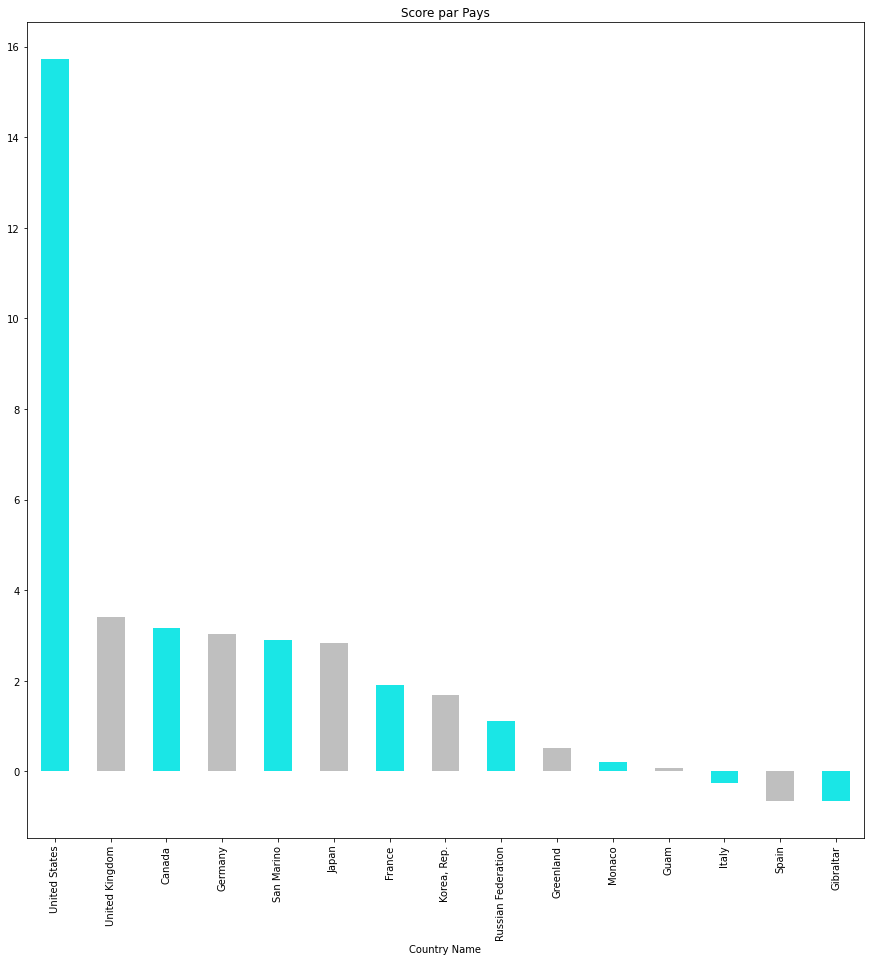

In [99]:

graph1 = df_score1["Score"].sort_values(ascending=False).head(15)
my_colors = [(0.1,0.9,0.9), (0.75, 0.75, 0.75)]
ax = graph1.plot(kind="bar", figsize=(15,15), title="Score par Pays", xlabel='Country Name', color=my_colors)
fig = ax.get_figure()
plt.show()

Conclusion: LE TOP 10 des pays avec les meilleurs scores est:

1- United States	
2- United Kingdom	
3- Canada	
4- Germany

5- San Marino	
6- Japan	
7- France	
8- Korea, Rep.	
9- Russian Federation

10- Greenland

E) Choix des meilleurs zones géographiques

Creation d'un dataFrame avec comme index les pays et comme colonnes les indicateurs et contenant les données sur les années d'etudes 

In [80]:

df_score2 = ScoringPays.pivot_table(index=['Region'], columns="Indicator Code")['AnneesEtudes']
df_score2.head()


Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3
Region,,,,,,
East Asia & Pacific,31.983180,52.612176,28552.649823,2.181724e+06,7.163508e+06,2.011051e+06
Europe & Central Asia,43.052058,58.630360,32151.772497,2.546487e+06,9.391148e+06,1.937906e+06
Latin America & Caribbean,8.051310,37.847186,20846.734732,1.533687e+06,1.061678e+07,1.299442e+06
Middle East & North Africa,18.182551,25.367634,31298.340931,1.679651e+06,8.596431e+06,2.034380e+06
North America,84.840665,75.544935,44839.105883,1.919801e+07,2.450856e+07,6.712015e+06


In [81]:
#Calcul des score pour chaque indicateur 
df_score2 ["ScorePop"] = (df_score2[nb_eleves]-df_score2[nb_eleves].mean())/df_score2[nb_eleves].std(ddof=0)
# score population entre 15 et 24 ans
df_score2["ScoreInt"] = (df_score2[internet]-df_score2[internet].mean())/df_score2[internet].std(ddof=0)
# score internet
df_score2 ["ScorePIB"] = (df_score2[PIB]-df_score2[PIB].mean())/df_score2[PIB].std(ddof=0)
# score PIB
df_score2 ["ScoreC"] = (df_score2[computer]-df_score2[computer].mean())/df_score2[computer].std(ddof=0)
# score Computer
df_score2 ["ScoreU"] = (df_score2[inscriptionUniversité]-df_score2[inscriptionUniversité].mean())/df_score2[inscriptionUniversité].std(ddof=0)
#score universite

df_score2 ["ScoreL"] = (df_score2[inscriptionLycée]-df_score2[inscriptionLycée].mean())/ df_score2[inscriptionLycée].std(ddof=0)
#scoreLyceee

df_score2['Score'] =df_score2.fillna(0) ["ScorePop"] + df_score2.fillna(0) ["ScoreInt"] + df_score2.fillna(0) ["ScorePIB"] + df_score2.fillna(0)["ScoreC"] + df_score2.fillna(0) ["ScoreU"] + df_score2.fillna(0)["ScoreL"]

In [82]:
#RegionsparScore 
df_score2.sort_values(by='Score',ascending=False).head(10)

Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.3,ScorePop,ScoreInt,ScorePIB,ScoreC,ScoreU,ScoreL,Score
Region,,,,,,,,,,,,,
North America,84.840665,75.544935,44839.105883,1.919801e+07,2.450856e+07,6.712015e+06,1.968326,1.480599,1.715575,1.789014,1.997260,1.981080,10.931854
Europe & Central Asia,43.052058,58.630360,32151.772497,2.546487e+06,9.391148e+06,1.937906e+06,-0.421085,0.500203,0.079199,0.219034,-0.417931,-0.435929,-0.476509
East Asia & Pacific,31.983180,52.612176,28552.649823,2.181724e+06,7.163508e+06,2.011051e+06,-0.773179,0.151379,-0.385006,-0.196818,-0.470838,-0.398897,-2.073359
Middle East & North Africa,18.182551,25.367634,31298.340931,1.679651e+06,8.596431e+06,2.034380e+06,-0.546696,-1.427758,-0.030875,-0.715302,-0.543660,-0.387087,-3.651377
Latin America & Caribbean,8.051310,37.847186,20846.734732,1.533687e+06,1.061678e+07,1.299442e+06,-0.227366,-0.704423,-1.378893,-1.095928,-0.564831,-0.759167,-4.730608


- Graphique de scoring par Regions

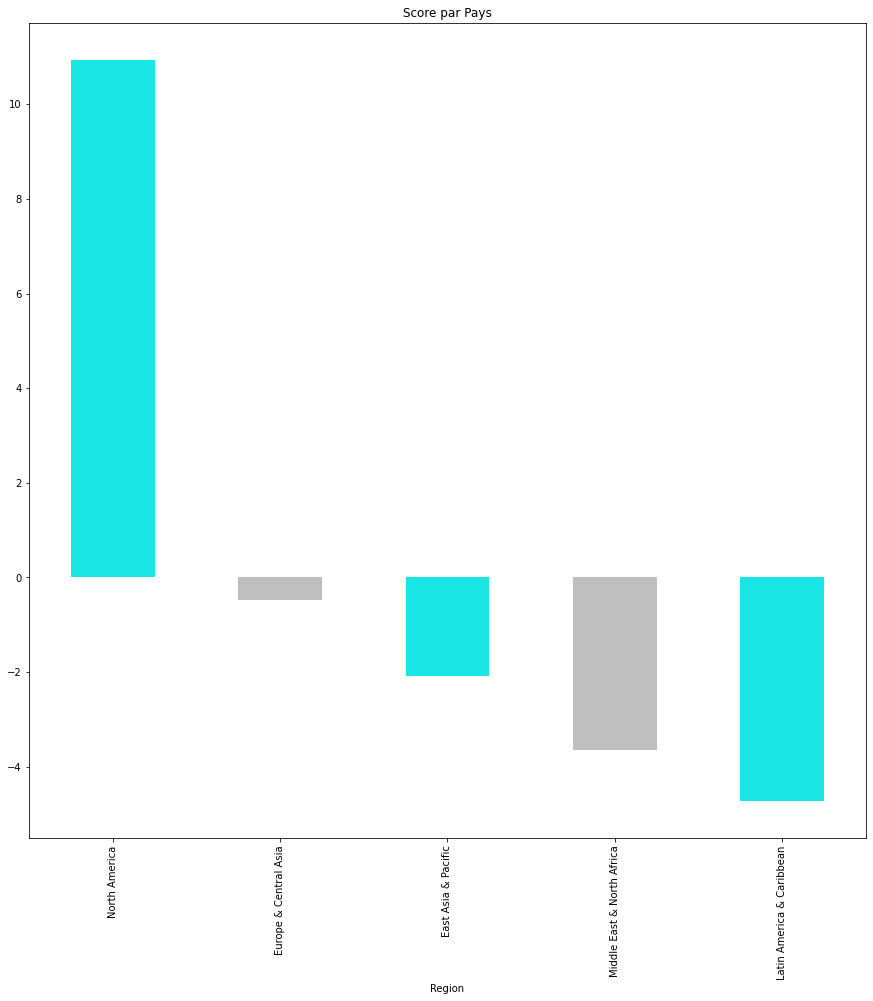

In [101]:

graph2 = df_score2["Score"].sort_values(ascending=False).head(15)
my_colors = [(0.1,0.9,0.9), (0.75, 0.75, 0.75)]
ax = graph2.plot(kind="bar", figsize=(15,15), title="Score par Pays", xlabel='Region', color=my_colors)
fig = ax.get_figure()
plt.show()

Conclusion Les meilleurs regions sont :

  1- North America 
  
  2- Europe & Central Asia

F) Choix des pays où l'entreprise doit opérer en priorité

1- United States	
2- United Kingdom	
3- Canada	
4- Germany

5- San Marino

Car Il sont les 5 pays avec le meilleurs score et appartiennent aux deux meilleurs regions